<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.852 · Tipología y ciclo de vida de los datos · PRA1</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PRA1: Web scraping - Testing file

In [1]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install builtwith

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install python-whois

Note: you may need to restart the kernel to use updated packages.


In [5]:
import requests
import builtwith
import whois
from bs4 import BeautifulSoup

In [7]:
# Let's check the technologies of the webpage we want to scrap
builtwith.parse('https://www.expatistan.com/cost-of-living/country/ranking')

{'web-servers': ['Nginx'], 'advertising-networks': ['Google AdSense']}

In [8]:
# Let's see the content of the webpage
page = requests.get("https://www.expatistan.com/cost-of-living/country/ranking")
page.content

b'<!DOCTYPE html>\n<html lang="en">\n<head>\n  <meta http-equiv="content-type" content="text/html; charset=utf-8" />\n                  <link rel="alternate" hreflang="en" href="https://www.expatistan.com/cost-of-living/country/ranking" />\n                <link rel="alternate" hreflang="es" href="https://www.expatistan.com/es/costo-de-vida/pais/ranking" />\n                <link rel="alternate" hreflang="pt" href="https://www.expatistan.com/pt/custo-de-vida/pais/classificacao" />\n          <title>Cost of Living Ranking by countries. Updated Apr 2023</title>\n<meta name="description" content="Ranking of the the cheapest and the most expensives countries in the world with current prices as of Apr 2023." />\n<meta property="og:title" content="Cost of Living Ranking by countries. Updated Apr 2023"/>\n<meta property="og:type" content="website"/>\n<meta property="og:description" content="Ranking of the the cheapest and the most expensives countries in the world with current prices as of Ap

In [9]:
# Let's see the owner of the domain
print(whois.whois("expatistan.com"))

{
  "domain_name": [
    "EXPATISTAN.COM",
    "expatistan.com"
  ],
  "registrar": "NAMECHEAP INC",
  "whois_server": "whois.namecheap.com",
  "referral_url": null,
  "updated_date": [
    "2018-07-27 13:28:22",
    "2018-07-27 13:28:22.640000"
  ],
  "creation_date": "2009-08-16 09:25:31",
  "expiration_date": "2023-08-16 09:25:31",
  "name_servers": [
    "NS-1210.AWSDNS-23.ORG",
    "NS-1673.AWSDNS-17.CO.UK",
    "NS-383.AWSDNS-47.COM",
    "NS-667.AWSDNS-19.NET",
    "NS1.LINODE.COM",
    "NS2.LINODE.COM",
    "NS3.LINODE.COM",
    "NS4.LINODE.COM",
    "NS5.LINODE.COM",
    "ns1.linode.com",
    "ns2.linode.com",
    "ns3.linode.com",
    "ns4.linode.com",
    "ns5.linode.com",
    "ns-667.awsdns-19.net",
    "ns-383.awsdns-47.com",
    "ns-1673.awsdns-17.co.uk",
    "ns-1210.awsdns-23.org"
  ],
  "status": "clientTransferProhibited https://icann.org/epp#clientTransferProhibited",
  "emails": [
    "abuse@namecheap.com",
    "7bf6de4f898b43a68152bbb9aed7ec79.protect@withheldforpr

In [10]:
# Let's analyse the structure of the html code
soup = BeautifulSoup(page.content)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <link href="https://www.expatistan.com/cost-of-living/country/ranking" hreflang="en" rel="alternate"/>
  <link href="https://www.expatistan.com/es/costo-de-vida/pais/ranking" hreflang="es" rel="alternate"/>
  <link href="https://www.expatistan.com/pt/custo-de-vida/pais/classificacao" hreflang="pt" rel="alternate"/>
  <title>
   Cost of Living Ranking by countries. Updated Apr 2023
  </title>
  <meta content="Ranking of the the cheapest and the most expensives countries in the world with current prices as of Apr 2023." name="description"/>
  <meta content="Cost of Living Ranking by countries. Updated Apr 2023" property="og:title"/>
  <meta content="website" property="og:type"/>
  <meta content="Ranking of the the cheapest and the most expensives countries in the world with current prices as of Apr 2023." property="og:description"/>
  <meta content="//d2y05869ftj0yg.cloudfron

In [15]:
def __get_countries_links(html,clase):
    """Return a list with values with the links for the specified class

    Parameters
    ----------
    html: link of the page
    clase : string to get the links from

    Returns
    -------
    List  of string values

    """
    tds = soup.find_all('td',{"class": clase})
    countries_links = []
    for td in tds:
        link = td.find('a').get('href')
        # Let's add the main currency to the links
        link+="?currency=EUR"
        countries_links.append(link)
    return countries_links

In [16]:
__get_countries_links(soup,"country-name")

['https://www.expatistan.com/cost-of-living/country/bermuda?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/singapore?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/switzerland?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/cayman-islands?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/bahamas?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/hong-kong?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/ireland?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/united-states?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/denmark?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/norway?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/netherlands?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/luxembourg?currency=EUR',
 'https://www.expatistan.com/cost-of-living/country/australia?currency=EU

Mabel adjunto captura sobre lo de las monedas. Lo que te he contado en el audio por Whatsapp.

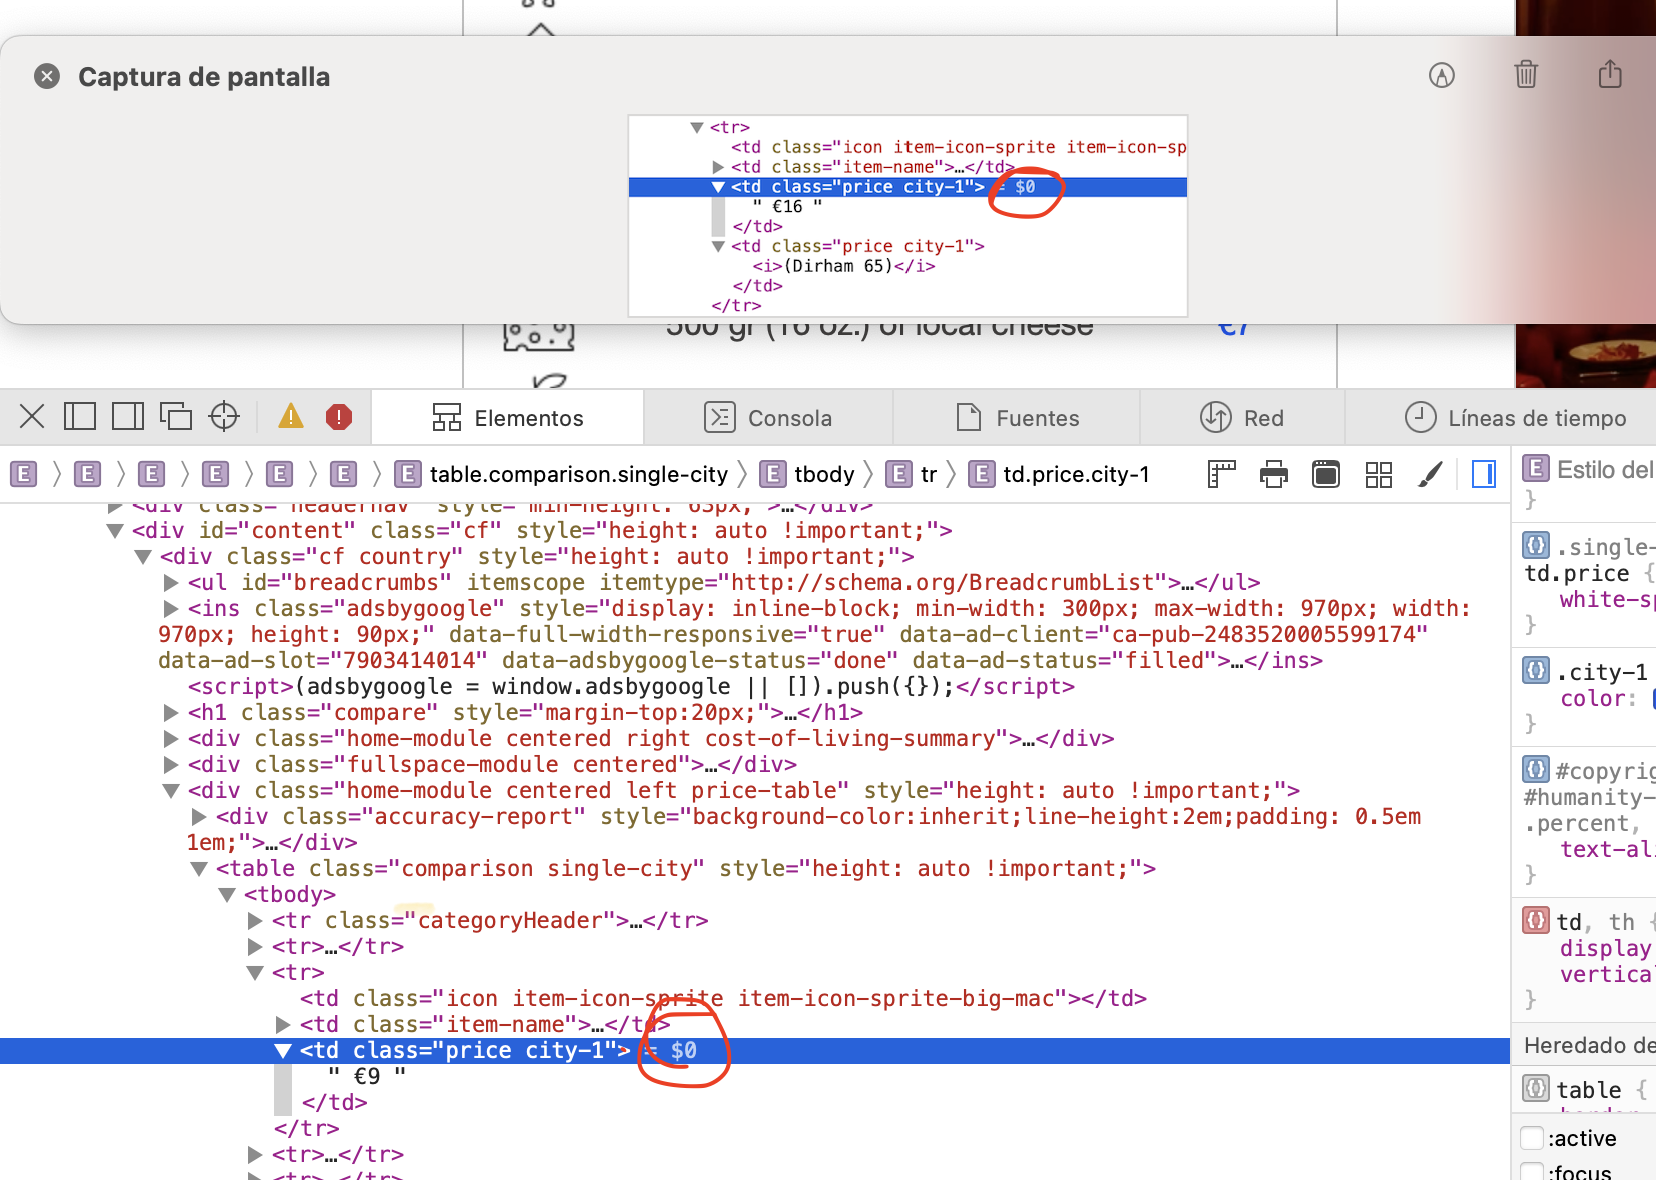